The Three-Body Problem
==========================================

Christopher Tripp | May 2018

NB: citations will be marked in brackets, such as "[xx]"

It is possible to obtain a closed-form solution to the problem of two bodies in mutual gravitational attraction.  However, there exists no general analytic solution to the problem of *three* bodies in mututal gravitational attraction.  Therefore, numerical methods must be used. 

The "restricted" three-body problem is a simplified version, wherein one of the three bodies has a comparatively negligible mass, and therefore the other two bodies do not feel its gravitational influence (allthough these other two bodies are still influenced by each other).  In this type of problem, we concern ourselves with solving for the path of this negligible-mass body.  To make our discussion easier, let's say that the two large-mass bodies are Jupiter and the Sun, while the negligible-mass body is an asteroid.

The restricted three-body problem will be most easily analyzed in a coordinate system that rotates with Jupiter and the Sun.  Since the solution of the two-body problem is that of Jupiter and the Sun rotating at constant angular velocity $\Omega$, these two bodies will be stationary in our **rotating coordinate system**.  The third body - the asteroid - will move in their gravitational fields and experience the additional acceleration terms associated with the rotation of the coordinate system.[1]

Let mass $M_1$ represent Jupiter, mass $M_2$ represent the Sun, and mass $m$ represent the asteroid.  

The solution (see [1]) to the two-body problem (that is, to the motion of $M_1$ and $M_2$) is a circular orbit about their center of mass with a frequency

$$\Omega =  \sqrt{\frac{G(M_1 + M_2)}{R^3}}$$

where $R$ is the distance between $M_1$ and $M_2$.

So, let us work in the frame rotating with frequency $\Omega$, centered on the center of mass of Jupiter ($M_1$) and the Sun ($M_2$).  In this frame, Jupiter and the Sun will sit at the fixed positions (see [2])

$$ \mathbf{r_1} = \left ( \frac{M_2 R}{M_1 + M_2} , 0, 0 \right )$$

$$ \mathbf{r_2} = \left ( -\frac{M_1 R}{M_1 + M_2} , 0, 0 \right )$$

where $R$ is, again, the (constant) Jupiter-Sun separation.  

The asteroid motion that we shall analyze will be restricted to a plane, and the equation of motion for the position $\mathbf{r} \equiv (x, y, 0)$ of the asteroid is (see [2]):

$$m \mathbf{a} = - \frac{GmM_1}{|\mathbf{r} - \mathbf{r_1}|^3} (\mathbf{r} - \mathbf{r_1}) - \frac{GmM_2}{|\mathbf{r} - \mathbf{r_2}|^3} (\mathbf{r} - \mathbf{r_2}) - 2m \mathbf{\Omega} \times \mathbf{v} - m \mathbf{\Omega} \times (\mathbf{\Omega} \times \mathbf{r})$$

where $\mathbf{\Omega} = \Omega(0, 0, 1)$, and where $\mathbf{v} \equiv (v_x, v_y, 0)$ is the velocity of the asteroid.  The first two terms on the right-hand side are the gravitational attraction of $M_1$ and $M_2$ on the asteroid $m$.  The rightmost terms are the Coriolis force,
$$- 2m \mathbf{\Omega} \times \mathbf{v} \equiv 2m\Omega(v_y, -v_x, 0)$$
and the centrifugal force,
$$- m \mathbf{\Omega} \times (\mathbf{\Omega} \times \mathbf{r}) \equiv m\Omega^2(x, y, 0)$$


In terms of components, the equation of motion becomes:

$$\frac{d^2 x}{dt^2} = - \frac{M_1 G (x - x_1)}{[(x - x_1)^2 + y^2]^{3/2}} - \frac{M_2 G (x - x_2)}{[(x - x_2)^2 + y^2]^{3/2}} + \frac{(M_1 + M_2)G x}{R^3} + 2 \Omega \frac{dy}{dt}$$

$$\frac{d^2 y}{dt^2} = - \frac{M_1 G y}{[(x - x_1)^2 + y^2]^{3/2}} - \frac{M_2 G y}{[(x - x_2)^2 + y^2]^{3/2}} + \frac{(M_1 + M_2)G y}{R^3} - 2 \Omega \frac{dx}{dt}$$

where $x_1$ is the $x$-component of $r_1$ and $x_2$ is the $x$-component of $r_2$.

Lagrange studied this type of system, and determined that in the corotating frame where $M_1$ and $M_2$ are at rest, there are five points of equilibrium for $m$, known as the **Lagrange points** L1 - L5.  In the inertial frame, these points correspond to stationary orbits, where the distance between $m$ and $M_1$ and $M_2$ stays constant at all times.  In the corotating frame that we are studying, the points L1, L2, and L3 sit along the line that joins $M_1$ and $M_2$; these points are **unstable**, meaning that if the asteroid starts there it will gradually veer off.  On the other hand, L4 and L5, which sit approimately along the orbit of $M_1$, are **stable** points.  

Let's plot some of these by adapting the RK4 routine that we have used previously.

In [1]:
#python 2
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#take the array of a_i values and return the array of their derivatives, based on the diff eq we're trying to solve
def f_three_body_restric_orbit(a, t, r1, r2, omega):

    #constants
    G = (6.6742 * 10**(-11)) #gravitational constant (m^3 kg^-1 s^-2)
    M1 = (1.899 * 10**(27)) #mass of Jupiter (kg)
    M2 = (1.989 * 10**(30)) #mass of Sun (kg)
    R = (778.3 * 10**(9)) #semi major axis of Jupiter's orbit (m)
    Tj = (3.743 * 10**(8)) #period of Jupiter's orbit (seconds)

    #initialize derivative array
    da_dt = np.zeros(len(a))

    #a_0 = x
    #a_1 = y
    #a_2 = v_x
    #a_3 = v_y

    #d(a_0)/dt = a_2
    da_dt[0] = a[2]

    #d(a_1)/dt = a_3
    da_dt[1] = a[3]

    #d(a_0)/dt = dx/dt
    da_dt[2] = ((-(M1 * G * (a[0] - r1[0]))/(((a[0] - r1[0])**2.0 + (a[1])**2.0)**(3.0/2.0))) - ((M2 * G * (a[0] - r2[0]))/(((a[0] - r2[0])**2.0 + (a[1])**2.0)**(3.0/2.0))) + (((M1 + M2) * G * a[0])/(R**3.0)) + (2.0 * omega * a[3]))

    #d(a_1)/dt = dy/dt
    da_dt[3] = ((-(M1 * G * a[1])/(((a[0] - r1[0])**2.0 + (a[1])**2.0)**(3.0/2.0))) - ((M2 * G * a[1])/(((a[0] - r2[0])**2.0 + (a[1])**2.0)**(3.0/2.0))) + (((M1 + M2) * G * a[1])/(R**3.0)) - (2.0 * omega * a[2]))

    return da_dt

In [3]:
#take an array of our variables a_i at time=t and return array a_i at time=(t+h) using RK4 method
def rungekutta_threebody(f, old_vals, t, h, r1, r2, omega):
    k1 = h*(f(old_vals, t, r1, r2, omega))
    k2 = h*(f((old_vals + (0.5*k1)), (t + (0.5*h)), r1, r2, omega))
    k3 = h*(f((old_vals + (0.5*k2)), (t + (0.5*h)), r1, r2, omega))
    k4 = h*(f((old_vals + k3), (t + h), r1, r2, omega))
    return (old_vals + ((1.0/6.0)*(k1 + (2*k2) + (2*k3) + k4)))

In [6]:
def three_body_orbit_ode_solver(deriv_func, x_0, y_0, vx_0, vy_0):

    #constants
    G = (6.6742 * 10**(-11)) #gravitational constant (m^3 kg^-1 s^-2)
    M1 = (1.899 * 10**(27)) #mass of Jupiter (kg)
    M2 = (1.989 * 10**(30)) #mass of Sun (kg)
    R = (778.3 * 10**(9)) #semi major axis of Jupiter's orbit (m)
    Tj = (3.743 * 10**(8)) #period of Jupiter's orbit (seconds)
    omega = np.sqrt((G*(M1 + M2))/(R**3))

    #Jupiter's "fixed" position in our frame
    r1 = np.zeros(3)
    r1[0] = ((M2 * R)/(M1 + M2))

    #the Sun's "fixed" position in our frame
    r2 = np.zeros(3)
    r2[0] = (-(M1 * R)/(M1 + M2))

    #define the step
    h = 4000

    #define the order of the original diff eq to be solved
    order = 4

    #initial time value
    t_init = 0

    #for an initial value problem, initial conditions are given for all the a_i
    a0_init = x_0
    a1_init = y_0
    a2_init = vx_0
    a3_init = vy_0

    #define the extent of the time interval we shall plot
    t_final = 85 * 10**8

    #create and initialize time array
    time_vals = np.arange(t_init, t_final, h)

    #create and initialize a_i array
    a = np.zeros(order)
    a[0] = a0_init
    a[1] = a1_init
    a[2] = a2_init
    a[3] = a3_init

    #create an array for the values of a_0, a_1 at each time
    a_0_solutions = np.zeros(len(time_vals))
    a_0_solutions[0] = a0_init #initialize
    a_1_solutions = np.zeros(len(time_vals))
    a_1_solutions[0] = a1_init #initialize

    #for each time t, use RK4 to find value of a_i at time=(t+h), then save a_0(t+h) into the array of a_0 values
    for t_n in np.arange(1, len(time_vals), 1):
        a = rungekutta_threebody(deriv_func, a, t_n, h, r1, r2, omega)
        a_0_solutions[t_n] = a[0]
        a_1_solutions[t_n] = a[1]

    #make 3D plot of orbit
    fig = plt.figure(dpi=200)
    ax = plt.axes(projection='3d')
    ax.plot([r1[0]], [0.], [0.], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=0.6) #plot Jupiter
    ax.plot([r2[0]], [0.], [0.], markerfacecolor='y', markeredgecolor='y', marker='o', markersize=5, alpha=0.6) #plot Sun
    ax.plot([R*((M2 - M1)/(M1 + M2))*np.cos(np.pi/3.0)], [R*np.sin(np.pi/3.0)], [0.], markerfacecolor='g', markeredgecolor='g', marker='o', markersize=3, alpha=0.6) #plot L4
    ax.plot3D(a_0_solutions, a_1_solutions, 0, 'b-', linewidth=0.8) #plot the asteroid's path
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

Let's first demonstrate the stability of the L4 point.  It has been shown (see [2]) that if we put the asteroid in an initial resting position at

$$r_{\text{i}} = R \left ( \frac{M_2 - M_1}{M_1 + M_2} \cos \alpha, \sin \alpha, 0   \right ) $$

where L4 and L5 correspond to $\alpha = \pm \tfrac{\pi}{3}$ then we will see small oscillations around these two Lagrange points.  

Let's put the asteroid at an initial resting position $\alpha = \tfrac{\pi}{3.5}$.  Since this is very slightly offset from the stable point L4 (that is, where $\alpha = \pm \tfrac{\pi}{3}$), we should see the asteroid oscillate tightly about L4 (which I have marked with a green dot).

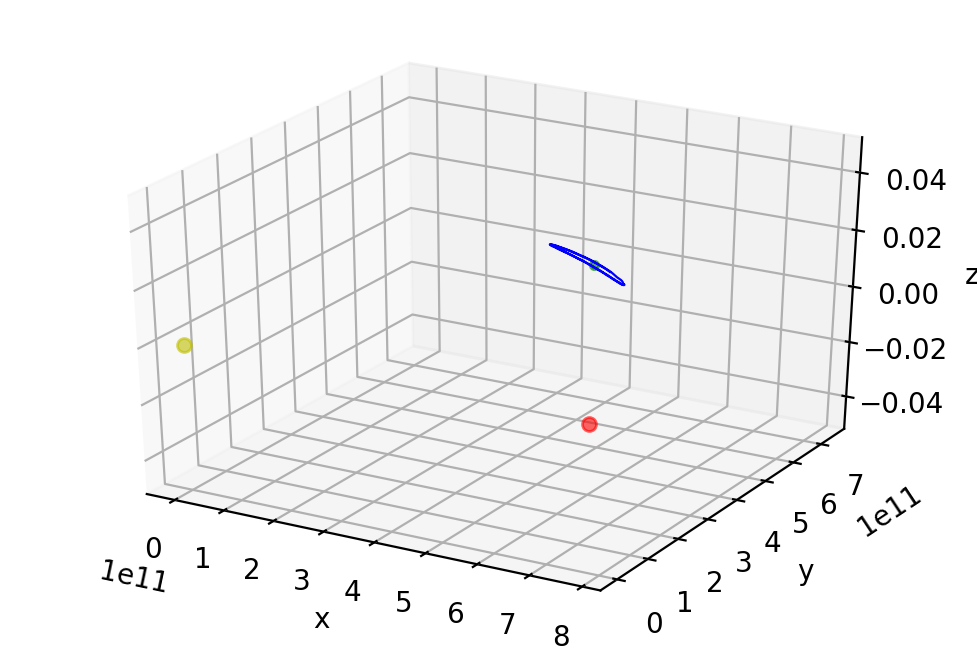

In [7]:
#constants
R = (778.3 * 10**(9)) #semi major axis of Jupiter's orbit (m)
G = (6.6742 * 10**(-11)) #gravitational constant (m^3 kg^-1 s^-2)
M1 = (1.899 * 10**(27)) #mass of the Jupiter (kg)
M2 = (1.989 * 10**(30)) #mass of Sun (kg)

#initial conditions to observe stability at L4
alpha = (np.pi)/3.5
x_0_stable = R*((M2 - M1)/(M1 + M2))*np.cos(alpha)
y_0_stable = R*np.sin(alpha)

#plot the orbit
three_body_orbit_ode_solver(f_three_body_restric_orbit, x_0_stable, y_0_stable, 0.0, 0.0)

It is a little hard to see in the still image that Jupyter displays above, but if you run the above code in a plain text editor, you can zoom and rotate within the resulting 3d image and you will see that, indeed, the asteroid oscillates about the point L4 (the green dot).

Now let's alter the starting position in a way that will result in an unstable orbit.

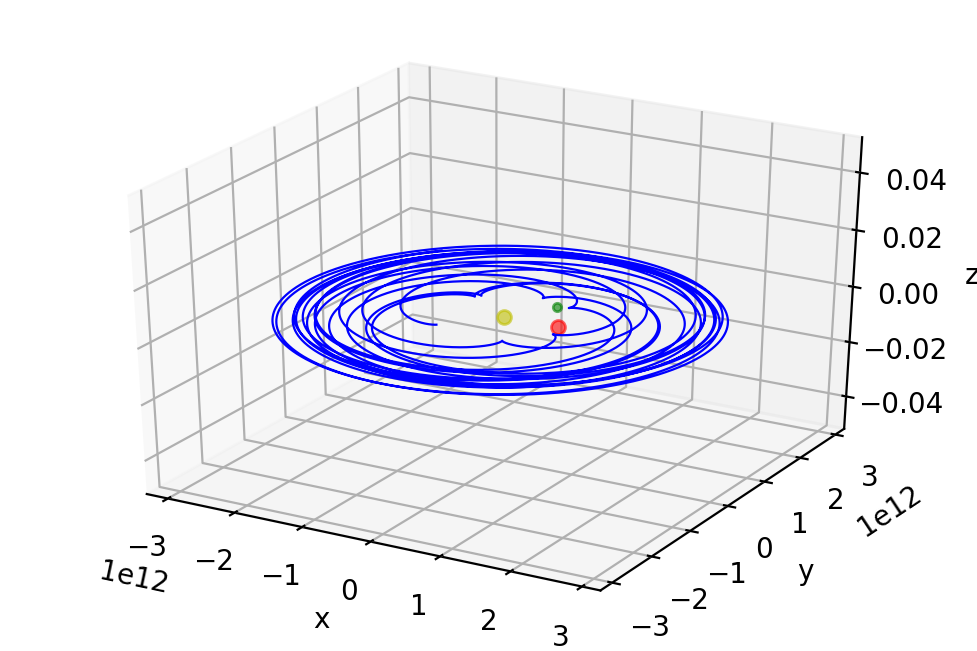

In [20]:
x_0_unstable = R*((M2 - M1)/(M1 + M2))*np.cos(2.43452)
y_0_unstable = R*np.sin(4.168)

three_body_orbit_ode_solver(f_three_body_restric_orbit, x_0_unstable, y_0_unstable, 0.0, 0.0)

Unlike the tight oscillation which resulted when the asteroid started near a stable point (L4), this time the asteroid wanders all over the place.

Sources:

[1] "Lecture L18 - Exploring the Neighborhood: the Restricted Three-Body Problem", https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-07-dynamics-fall-2009/lecture-notes/MIT16_07F09_Lec18.pdf

[2] "The Three Body Problem," http://pmaweb.caltech.edu/~physlab/lab_22_current/Ph22_2_Three_body.pdf